<a href="https://colab.research.google.com/github/ayoub-sys/machineLearning/blob/main/NaiveBayesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
from google.colab import files 
import glob 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
#uploaded=files.upload()

In [ ]:
import glob 
import os
files=glob.glob('/content/youtube-dataset/*.csv')
files



In [18]:
all_df=[]
for i in files : 
  all_df.append(pd.read_csv(i).drop(['COMMENT_ID', 'AUTHOR','DATE'],axis=1))

In [19]:
all_df[0]

,CONTENT,CLASS
0,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,wierd but funny﻿,0
2,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,Party Rock....lol...who wants to shuffle!!!﻿,0
4,Party rock﻿,0
...,...,...
433,Like this comment for no reason﻿,1
434,love this song﻿,0
435,this song is awesome. these guys are the best....,1
436,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,1


In [21]:
data=pd.concat(all_df,axis=0,ignore_index=True)
data

,CONTENT,CLASS
0,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,wierd but funny﻿,0
2,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,Party Rock....lol...who wants to shuffle!!!﻿,0
4,Party rock﻿,0
...,...,...
1950,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
1951,Check out my videos guy! :) Hope you guys had ...,1
1952,3 yrs ago I had a health scare but thankfully ...,1
1953,Rihanna looks so beautiful with red hair ;)﻿,0


In [23]:
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [24]:
data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

Sample I

In [28]:
message_sample=['This is a dog']
vectorizer_sample=CountVectorizer()
vectorizer_sample.fit(message_sample)
vectorizer_sample.transform(message_sample).toarray()

array([[1, 1, 1]])

In [29]:
vectorizer_sample.get_feature_names_out()

array(['dog', 'is', 'this'], dtype=object)

In [31]:
vectorizer_sample.transform(['This is a cat']).toarray()

array([[0, 1, 1]])

# SAMPLE 2

In [36]:
message_sample2=['This is a dog and that is a dog','This is a cat']
vectorizer_sample2=CountVectorizer()
vectorizer_sample2.fit_transform(message_sample2).toarray()

array([[1, 0, 2, 2, 1, 1],
       [0, 1, 0, 1, 0, 1]])

In [37]:
vectorizer_sample2.get_feature_names_out()

array(['and', 'cat', 'dog', 'is', 'that', 'this'], dtype=object)

In [39]:
vectorizer_sample2.transform(['Those is are birds']).toarray()

array([[0, 0, 0, 1, 0, 0]])

# Defining the inputs and the targets- Creating the train-test split 


In [44]:
data.describe()

,CLASS
count,1955.000000
mean,0.513555
std,0.499944
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [47]:
inputs=data['CONTENT']
target=data['CLASS']


In [48]:
x_train,x_test,y_train, y_test= train_test_split(inputs,target,test_size=0.2, random_state=365,stratify=target)

In [49]:
y_train.value_counts(normalize=True)

1    0.513427
0    0.486573
Name: CLASS, dtype: float64

In [51]:
y_test.value_counts(normalize=True)

1    0.514066
0    0.485934
Name: CLASS, dtype: float64

# Tokenize the youtube comments

In [52]:
vectorizer=CountVectorizer()
x_train_transf=vectorizer.fit_transform(x_train)
x_test_transf=vectorizer.transform(x_test)


In [55]:
x_train_transf.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [57]:
x_train_transf.shape

(1564, 3891)

In [58]:
x_test_transf.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [60]:
x_test_transf.shape

(391, 3891)

# Performing the classification 

In [62]:
clf= MultinomialNB()
clf.fit(x_train_transf,y_train)

MultinomialNB()

In [63]:
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

# Performing the evaluation on the test database 

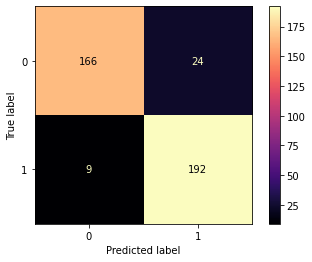

In [67]:
y_test_pred=clf.predict(x_test_transf)
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,labels=clf.classes_, cmap='magma')

In [69]:
print(classification_report(y_test,y_test_pred,target_names=['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.95      0.87      0.91       190
        Spam       0.89      0.96      0.92       201

    accuracy                           0.92       391
   macro avg       0.92      0.91      0.92       391
weighted avg       0.92      0.92      0.92       391

